In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive'

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
#Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
data = "project"

In [ ]:
image_dir = Path(data)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.PNG'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("project").rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
image_df

,Filepath,Label
0,project/weapon_usage/undefined-1575555697-924-...,weapon_usage
1,project/weapon_usage/73d96b1b494d8e0563255b1f9...,weapon_usage
2,project/weapon_usage/tim.png,weapon_usage
3,project/weapon_usage/B0yn-hiqtcan8730246 (1).png,weapon_usage
4,project/weapon_usage/f1fd2da9063bf2a9bdcaa313a...,weapon_usage
...,...,...
630,project/accident/mqdefault (6).png,accident
631,project/accident/367x232.png,accident
632,project/accident/HYiDlz38MYbVJdnCAiILOfFy8fzlw...,accident
633,project/accident/5852564.png,accident


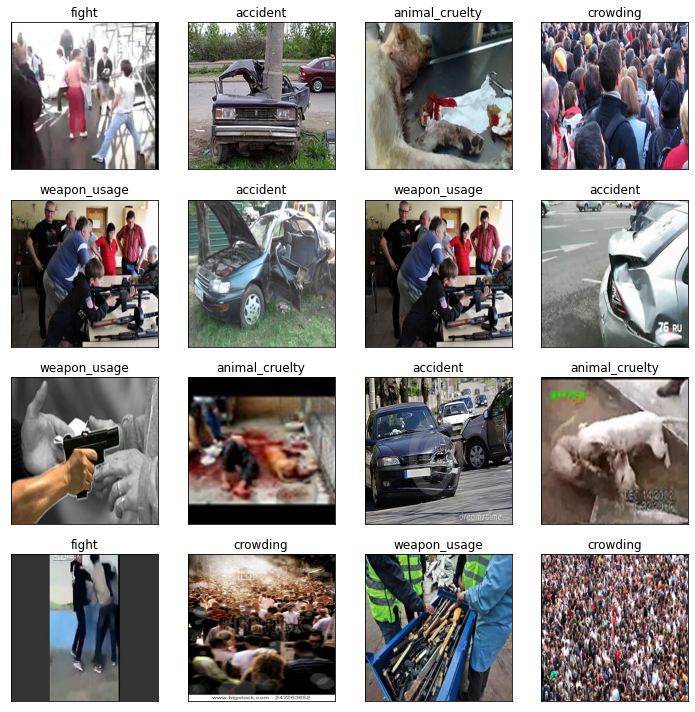

In [ ]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                  shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest',
    validation_split=0.2) # set validation split

In [ ]:
train_images = train_datagen.flow_from_directory(
    data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_images = train_datagen.flow_from_directory(
    data , # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 511 images belonging to 6 classes.
Found 124 images belonging to 6 classes.


In [ ]:
# Load the pretained model
mobile_model = Sequential()

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

mobile_model.add(pretrained_model)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mobile_model.add(Flatten())
mobile_model.add(Dense(512, activation='relu'))
mobile_model.add(Dropout(0.2))
mobile_model.add(Dense(6, activation='softmax'))

In [ ]:
mobile_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                        

In [ ]:
mobile_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)



In [ ]:
history = mobile_model.fit(train_images,batch_size=32,validation_data=validation_images,epochs=25,verbose=1)

Epoch 1/25
16/16 [==============================] - 52s 3s/step - loss: 1.7296 - accuracy: 0.3131 - val_loss: 1.6395 - val_accuracy: 0.4355
Epoch 2/25
16/16 [==============================] - 41s 3s/step - loss: 1.5532 - accuracy: 0.4716 - val_loss: 1.4514 - val_accuracy: 0.5081
Epoch 3/25
16/16 [==============================] - 37s 2s/step - loss: 1.3786 - accuracy: 0.5049 - val_loss: 1.3038 - val_accuracy: 0.4919
Epoch 4/25
16/16 [==============================] - 40s 3s/step - loss: 1.2272 - accuracy: 0.4892 - val_loss: 1.2106 - val_accuracy: 0.5000
Epoch 5/25
16/16 [==============================] - 40s 3s/step - loss: 1.1409 - accuracy: 0.4658 - val_loss: 1.1142 - val_accuracy: 0.5000
Epoch 6/25
16/16 [==============================] - 40s 3s/step - loss: 1.1019 - accuracy: 0.4990 - val_loss: 1.1174 - val_accuracy: 0.5000
Epoch 7/25
16/16 [==============================] - 40s 3s/step - loss: 1.0927 - accuracy: 0.4736 - val_loss: 1.0948 - val_accuracy: 0.5081
Epoch 8/25
16/16 [==

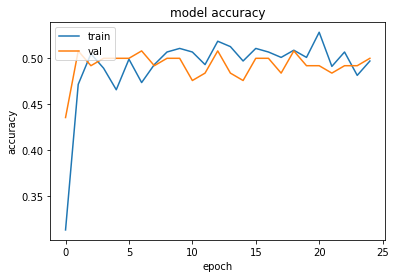

In [ ]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

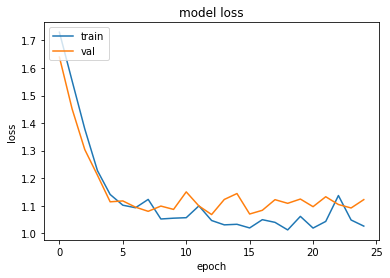

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
mobile_model.save("mobile_unsus.h5")

In [ ]:
mobile_model.save("mobile_unsus.pb")